## Analysis of dataEpinions Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned dataEpinions sub-dataset that is different from the one in Portfolio 1. 

In [276]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import warnings; warnings.simplefilter('ignore')

dataEpinions = pd.read_csv("epinions_cleaned_data_portfolio_2.csv")
print(dataEpinions)
print("length : ", len(dataEpinions))

      userId  timestamp                                             review  \
0       4259      11900        Finally, Something for (Relatively) Nothing   
1       4259      12000                                          Shocking!   
2       4259      12000                                Simply Shaggadelic!   
3       4259      12000                             Better Than The First!   
4       4259      12000                Blair Witch made me appreciate this   
...      ...        ...                                                ...   
2894   10815     112799  I dare you to sleep through this soon to be cl...   
2895   10815     121299      Another movie to keep us out of the water!!!!   
2896   10815     121399                           Miles above other films.   
2897   10815     121499       This could be the beginning of a comedy era.   
2898   10815     121499                     Maybe it should have been cut?   

                                         item  rating  helpfuln

### Import Cleaned dataEpinions Dataset
The csv file named 'dataEpinions_cleaned_data_portfolio_2.csv'is provided. Please import the csv file (i.e., 'dataEpinions_cleaned_data_portfolio_2') and print out its total length.

### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column. 
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating (positive or negative). Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [277]:
dataEpinions.head() 

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,4.0,4.0,F,Online Stores & Services
1,4259,12000,Shocking!,Sixth Sense,5.0,4.0,F,Movies
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5.0,4.0,F,Movies
3,4259,12000,Better Than The First!,Toy Story 2,5.0,3.0,F,Movies
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2.0,4.0,F,Movies


In [278]:
dataEpinions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2899 non-null   int64  
 1   timestamp    2899 non-null   int64  
 2   review       2899 non-null   object 
 3   item         2899 non-null   object 
 4   rating       2899 non-null   float64
 5   helpfulness  2899 non-null   float64
 6   gender       2899 non-null   object 
 7   category     2899 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 181.3+ KB


In [279]:
# Correlation between helpfulness and Rating
dataEpinions[['helpfulness', 'rating']].corr()

,helpfulness,rating
helpfulness,1.000000,-0.016832
rating,-0.016832,1.000000


In [280]:
# Correlation between Category and Rating
ord_enc = OrdinalEncoder()
dataEpinions["category_code"] = ord_enc.fit_transform(dataEpinions[["category"]])
dataEpinions[['category_code', 'rating']].corr()

,category_code,rating
category_code,1.000000,-0.140576
rating,-0.140576,1.000000


In [1]:
# Correlation between Review and Rating 
ord_enc = OrdinalEncoder()
dataEpinions["review_code"] = ord_enc.fit_transform(dataEpinions[["review"]])
dataEpinions[['review_code', 'rating']].corr()

NameError: name 'OrdinalEncoder' is not defined

In [282]:
ord_enc = OrdinalEncoder()
dataEpinions["gender_code"] = ord_enc.fit_transform(dataEpinions[["gender"]])
dataEpinions[['gender_code', 'rating']].corr()

,gender_code,rating
gender_code,1.000000,0.018105
rating,0.018105,1.000000


## Analysis on the correlation between different categories and rating
The most Correlated features are category and rating since they are the closest to -1. (which is a completely linear negative relationship. The least Correlated features are helpfulness and rating as their relationship is the least close to -1/1, therefore it is the least correlated feature to rating. By training the linear regression model with the most and least correlated features, we will significantly improve the accuracy of our prediction results. 

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set. 
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data. 
* Print the shape of training and testing sets in the two cases. 

In [283]:
train, test = train_test_split(dataEpinions, test_size = 0.1, random_state=12)
print("train first case:", train.shape,"\n", "test:", test.shape)

train first case: (2609, 11) 
 test: (290, 11)


In [284]:
train2, test2 = train_test_split(dataEpinions, test_size= 0.9, random_state=12)
print("train second case:", train2.shape,"\n", "test:", test2.shape)

train second case: (289, 11) 
 test: (2610, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results. 
* To investigate whether feature selection affects the model performance, please select __two most correlated features and two least correlated features__ regarding rating, respectively. 
* Train __four__ linear regression models by following the conditions:
    - (model-a) using the training/testing data in __case 1__ with __two most__ correlated input features
    - (model-b) using the training/testing data in __case 1__ with __two least__ correlated input features
    - (model-c) using the training/testing data in __case 2__ with __two most__ correlated input features
    - (model-d) using the training/testing data in __case 2__ with __two least__ correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [285]:
reg = linear_model.LinearRegression()

# MODEL A
modelA_X = train[['review_code', 'category_code']]
modelA_y = train['rating']

modelA_test_X = test[['review_code', 'category_code']]
modelA_test_y = test['rating']
reg.fit(modelA_X, modelA_y)

# MODEL B
modelB_X = train[['helpfulness', 'gender_code']]
modelB_y = train['rating']

modelB_test_X = test[['helpfulness', 'gender_code']]
modelB_test_y = test['rating']
reg.fit(modelB_X, modelB_y)

# MODEL C
modelC_X = train2[['review_code', 'category_code']]
modelC_y = train2['rating']

modelC_test_X = test2[['review_code', 'category_code']]
modelC_test_y = test2['rating']
reg.fit(modelC_X, modelC_y)

# MODEL D
modelD_X = train2[['helpfulness', 'gender_code']]
modelD_y = train2['rating']

modelD_test_X = test2[['helpfulness', 'gender_code']]
modelD_test_y = test2['rating']
reg.fit(modelD_X, modelD_y)

LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [286]:
predicted = reg.predict(modelA_test_X)
mse = ((np.array(modelA_test_y)-predicted)**2).sum()/len(modelA_test_y)
print("MSE:", mse)
print("Root MSE:", np.sqrt(mse))

MSE: 603203.2841447439
Root MSE: 776.6616278307715


In [287]:
predicted = reg.predict(modelB_test_X)
mse = ((np.array(modelB_test_y)-predicted)**2).sum()/len(modelB_test_y)
print("MSE:", mse)
print("Root MSE:", np.sqrt(mse))

MSE: 1.7313557882031276
Root MSE: 1.3158099362001823


In [288]:
predicted = reg.predict(modelC_test_X)
mse = ((np.array(modelC_test_y)-predicted)**2).sum()/len(modelC_test_y)
print("MSE:", mse)
print("Root MSE:", np.sqrt(mse))

MSE: 578447.2943463807
Root MSE: 760.5572262140311


In [289]:
predicted = reg.predict(modelD_test_X)
mse = ((np.array(modelD_test_y)-predicted)**2).sum()/len(modelD_test_y)
print("MSE:", mse)
print("Root MSE:", np.sqrt(mse))

MSE: 1.8517220989053023
Root MSE: 1.3607799597676702


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

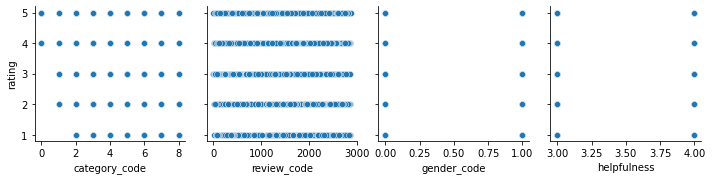

In [290]:
# Pairplot
sns.pairplot(dataEpinions,
    x_vars=["category_code", "review_code", "gender_code", "helpfulness"],
    y_vars=["rating"])

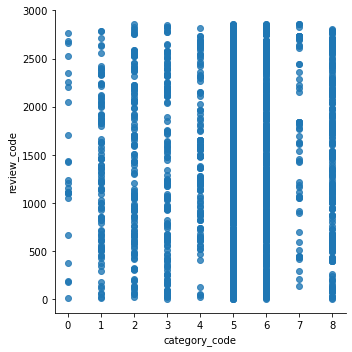

In [294]:
# Lmplot 
p = sns.lmplot('category_code', 'review_code', dataEpinions, height=5, fit_reg=False)

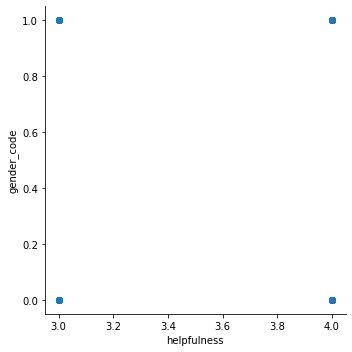

In [297]:
# Lmplot 
p = sns.lmplot('helpfulness', 'gender_code', dataEpinions, height=5, fit_reg=False)

<AxesSubplot:>

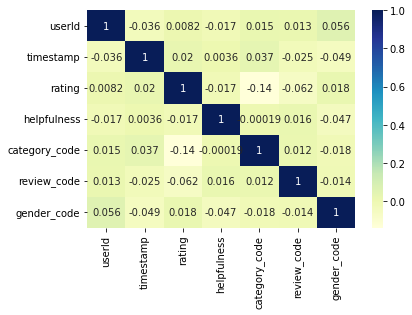

In [298]:
# Heatmap
sns.heatmap(dataEpinions.corr(), cmap="YlGnBu", annot = True)

### Analyse The Results:
The results that were gathered from my performance data is that the models have an extremely low correlation with the rating variable as shown in the plots.